# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
#sns.set()

# Reading the Data

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>f-string to show the largest/smallest number in the search data column</li> 
<li>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
</ul>

In [3]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [4]:
df_tesla.shape

(124, 3)

In [5]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [6]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [7]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


### Unemployment Data

In [8]:
print(df_unemployment.shape)
df_unemployment.head()

(181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [9]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [10]:
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [11]:
print(df_btc_search.shape)
df_btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [12]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [13]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [14]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [15]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
df_btc_price[df_btc_price["CLOSE"].isna()]

Number of missing values: 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


Removing any missing values that you found. 

In [16]:
df_btc_price.dropna(inplace=True)

In [17]:
df_btc_price.isna().sum()

DATE      0
CLOSE     0
VOLUME    0
dtype: int64

### Convert Strings to DateTime Objects

Checking the data type of the entries in the DataFrame MONTH or DATE columns. Converting any strings in to Datetime objects. Doing this for all 4 DataFrames. Double checking if type conversion was successful.

In [18]:
print(type(df_tesla["MONTH"][0]))
print(type(df_unemployment["MONTH"][0]))
print(type(df_btc_price["DATE"][0]))
print(type(df_btc_search["MONTH"][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [19]:
df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"])
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

In [20]:
print(type(df_tesla["MONTH"][0]))
print(type(df_unemployment["MONTH"][0]))
print(type(df_btc_price["DATE"][0]))
print(type(df_btc_search["MONTH"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [21]:
df_tesla['MONTH'].head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

In [22]:
df_btc_price_monthly = df_btc_price.resample("ME", on="DATE").last()

In [23]:
print(df_btc_price_monthly.shape)
df_btc_price_monthly.head()

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [24]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

### Tesla Stock Price v.s. Search Volume

Plotting the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

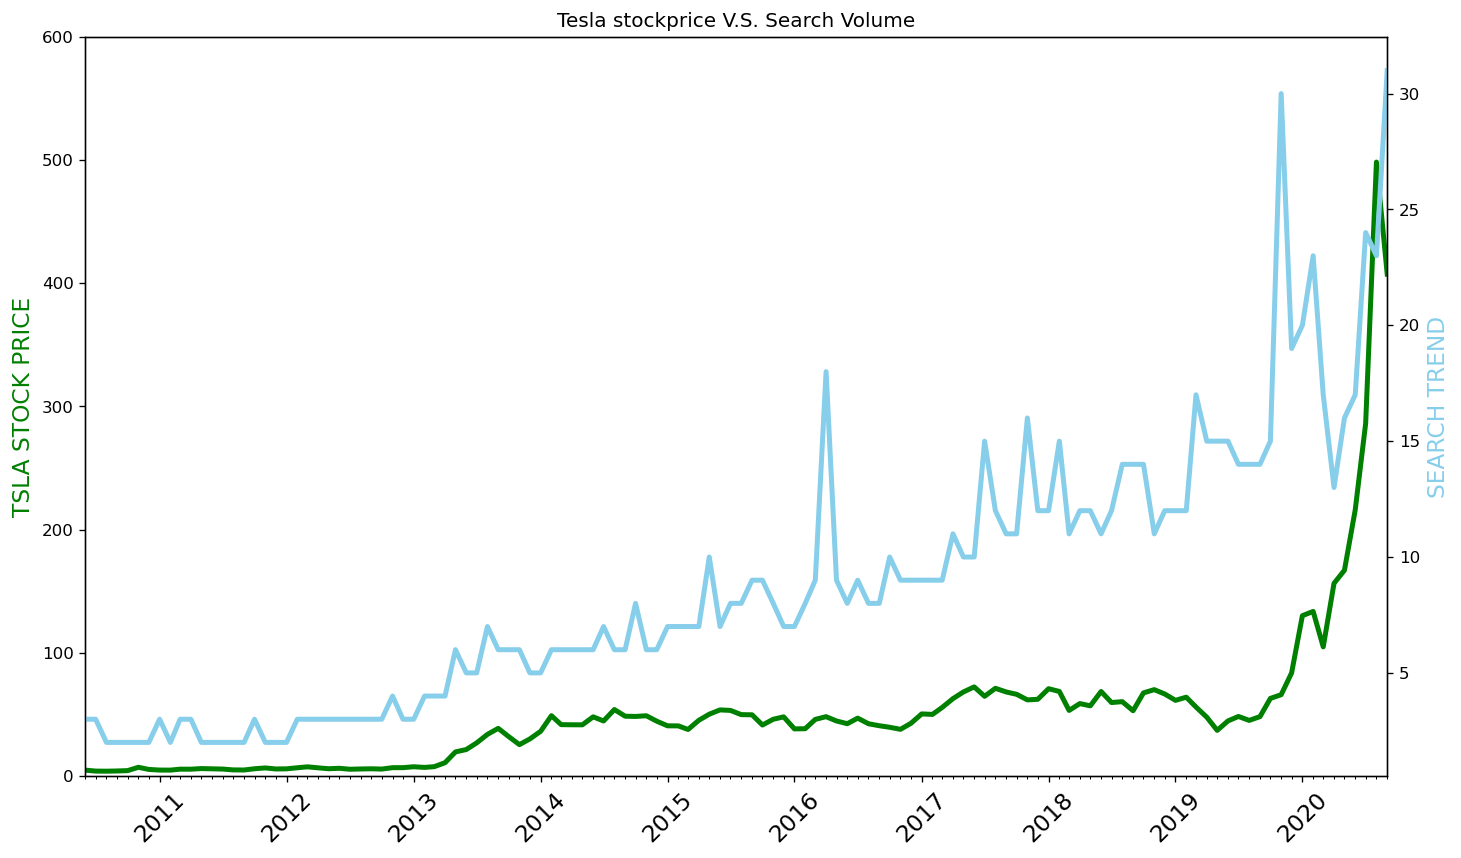

In [28]:

plt.figure(figsize=(14,8), dpi=120)
plt.title("Tesla stockprice V.S. Search Volume", fontsize=12)
plt.xticks(fontsize=14, rotation=45)


ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.set_ylim([0,600])
ax1.set_xlim(df_tesla["MONTH"].min(), df_tesla["MONTH"].max())
ax1.plot(df_tesla['MONTH'],df_tesla["TSLA_USD_CLOSE"], color="green", linewidth=3)
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color="skyblue", linewidth=3)
ax1.set_ylabel("TSLA STOCK PRICE", fontsize=14, color = "green")
ax2.set_ylabel("SEARCH TREND", fontsize=14, color = "skyblue")
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.xlabel("Years")

plt.show()

**When we take a look at our chart, The tick marks also allow us to visually date that spike of interest in the middle of the chart - March 2016. This was when the Tesla Model 3 was unveiled. Also, we can clearly see that the most recent spikes in search coincide, not with the release of a new car, but the roaring stock price for the company!**

### Bitcoin (BTC) Price v.s. Search Volume

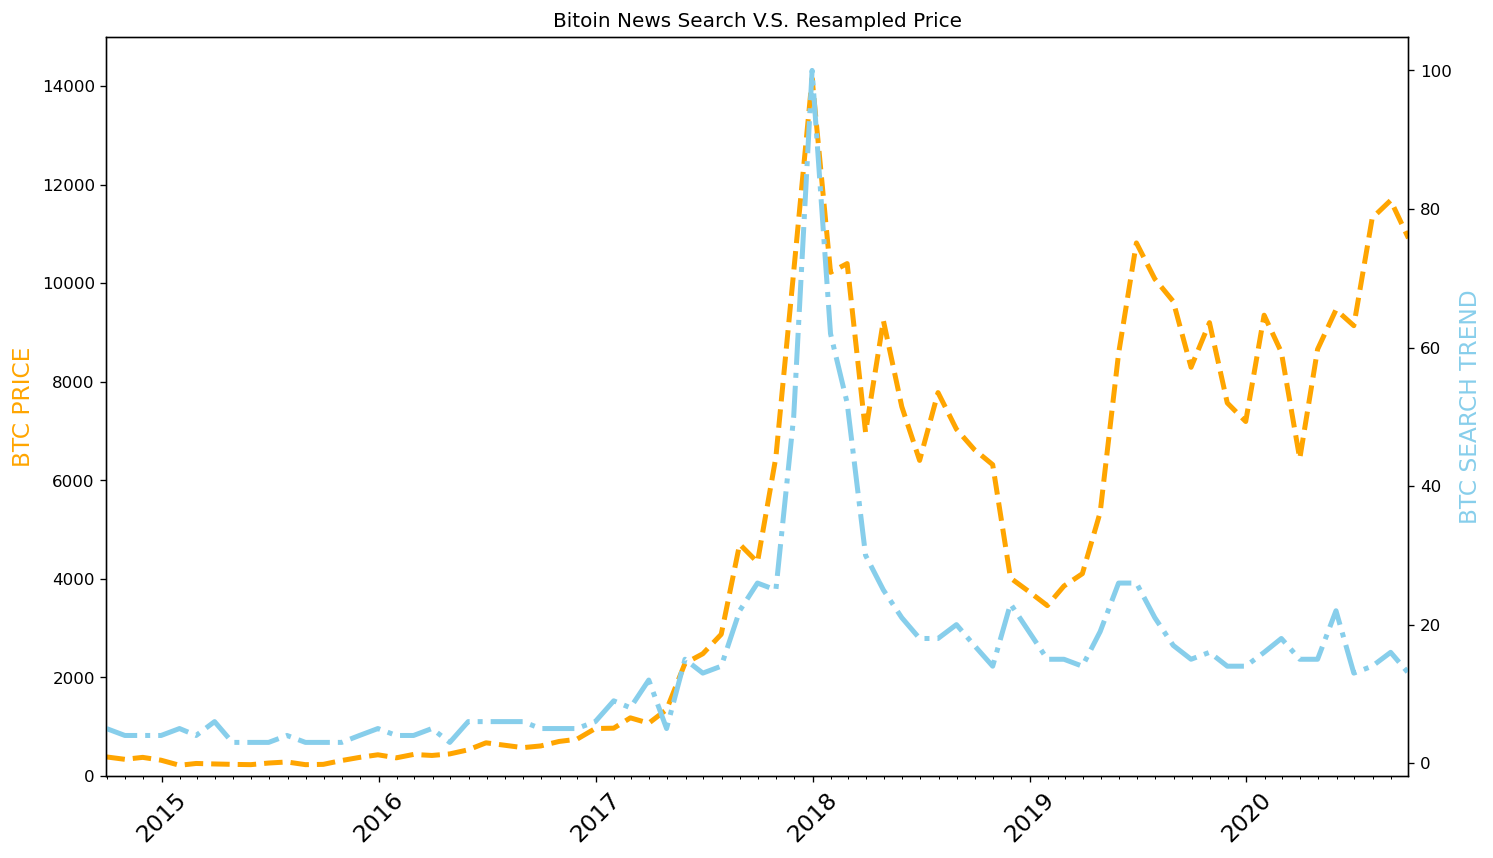

In [39]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Bitoin News Search V.S. Resampled Price", fontsize=12)
plt.xticks(fontsize=14, rotation=45)


ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.set_ylim([0,15000])
ax1.set_xlim(df_btc_price_monthly.index.min(), df_btc_price_monthly.index.max())
ax1.plot(df_btc_price_monthly.index,df_btc_price_monthly["CLOSE"], color="orange", linewidth=3, linestyle="dashed")
ax2.plot(df_btc_price_monthly.index, df_btc_search["BTC_NEWS_SEARCH"], color="skyblue", linewidth=3, linestyle="-.")
ax1.set_ylabel("BTC PRICE", fontsize=14, color = "orange")
ax2.set_ylabel("BTC SEARCH TREND", fontsize=14, color = "skyblue")
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.xlabel("Years")

plt.show()

**What we see in the chart is that similar to Tesla, the crazy price movements in the beginning of 2018 are associated with very high search volumes. Everyone was talking about (and buying) Bitcoin in late 2017/early 2018 so search volumes were at a record high!  Interestingly, there was quite a huge spike in bitcoin prices in Q1 of 2019, but this time the increase in search volume was much less pronounced (perhaps because at this point everyone knew what Bitcoin was).**

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

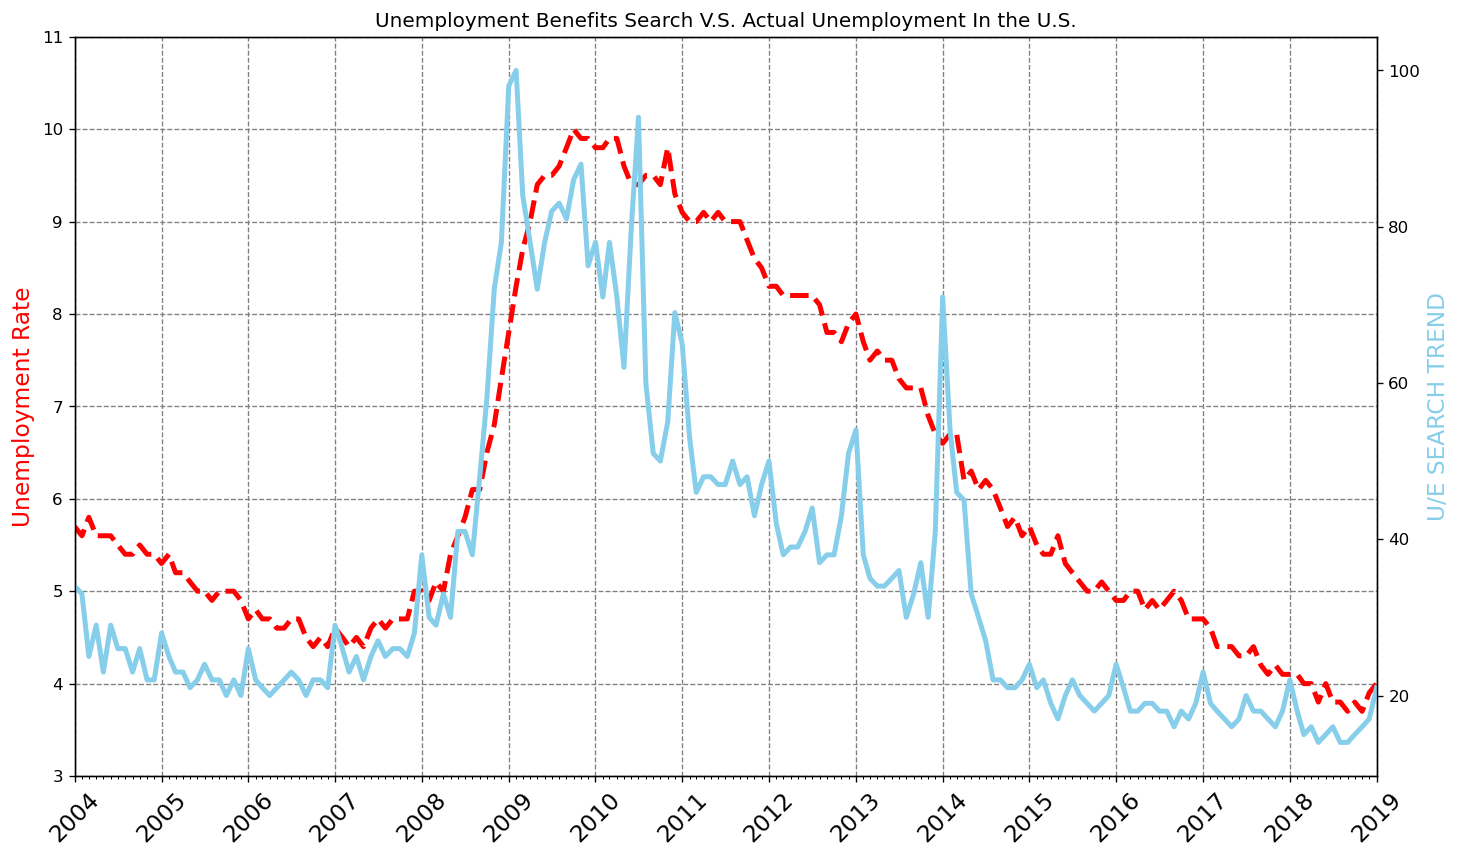

In [48]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Unemployment Benefits Search V.S. Actual Unemployment In the U.S.", fontsize=12)
plt.xticks(fontsize=14, rotation=45)


ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')
ax1.set_ylim([3,11])
ax1.set_xlim(df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max())
ax1.plot(df_unemployment['MONTH'],df_unemployment["UNRATE"], color="red", linewidth=3, linestyle="dashed")
ax2.plot(df_unemployment["MONTH"], df_unemployment["UE_BENEFITS_WEB_SEARCH"], color="skyblue", linewidth=3)
ax1.set_ylabel("Unemployment Rate", fontsize=14, color = "red")
ax2.set_ylabel("U/E SEARCH TREND", fontsize=14, color = "skyblue")
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.xlabel("Years")

plt.show()

**Notice how we can now clearly see the vertical dashed lines line up with spikes in searches for "Unemployment benefits". Many of the spikes are at year-end - in December. This clearly shows that there is seasonality in the job market. What else do we see? We see that the financial crisis in 2007/2008 caused a massive spike in unemployment. It took around 10 years (2007-2017) for the unemployment to reach the same level it had before the crisis.**

Calculating the 3-month or 6-month rolling average for the web searches.


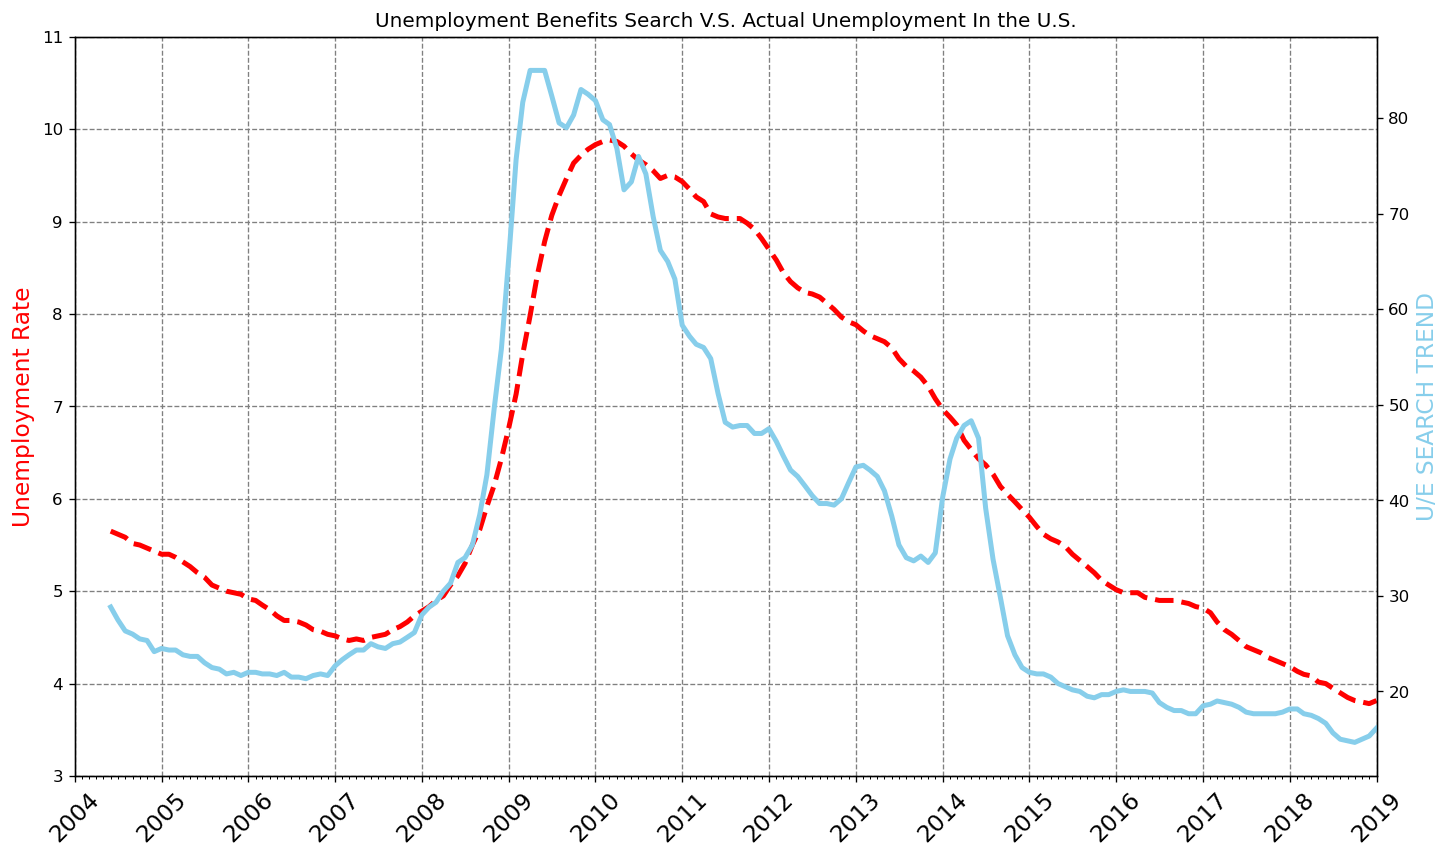

In [47]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Unemployment Benefits Search V.S. Actual Unemployment In the U.S.", fontsize=12)
plt.xticks(fontsize=14, rotation=45)


ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')
ax1.set_ylim([3,11])
ax1.set_xlim(df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max())

roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment['MONTH'],roll_df["UNRATE"], color="red", linewidth=3, linestyle="dashed")
ax2.plot(df_unemployment["MONTH"], roll_df["UE_BENEFITS_WEB_SEARCH"], color="skyblue", linewidth=3)
ax1.set_ylabel("Unemployment Rate", fontsize=14, color = "red")
ax2.set_ylabel("U/E SEARCH TREND", fontsize=14, color = "skyblue")
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.xlabel("Years")

plt.show()

 **We see that searches for "Unemployment Benefits" happen before the actual official unemployment rate goes up. Similarly, the search popularity for the term goes down before the unemployment rate decreases. In other words, these searches seem to act as a leading economic indicator for the unemployment rate.**

### Including 2020 in Unemployment Charts

In [49]:
df_ue_2020 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")
df_ue_2020.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [50]:
df_ue_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   200 non-null    object 
 1   UE_BENEFITS_WEB_SEARCH  200 non-null    int64  
 2   UNRATE                  200 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


In [52]:
df_ue_2020["MONTH"] = pd.to_datetime(df_ue_2020['MONTH'])
df_ue_2020["MONTH"].head()

0   2004-01-01
1   2004-02-01
2   2004-03-01
3   2004-04-01
4   2004-05-01
Name: MONTH, dtype: datetime64[ns]

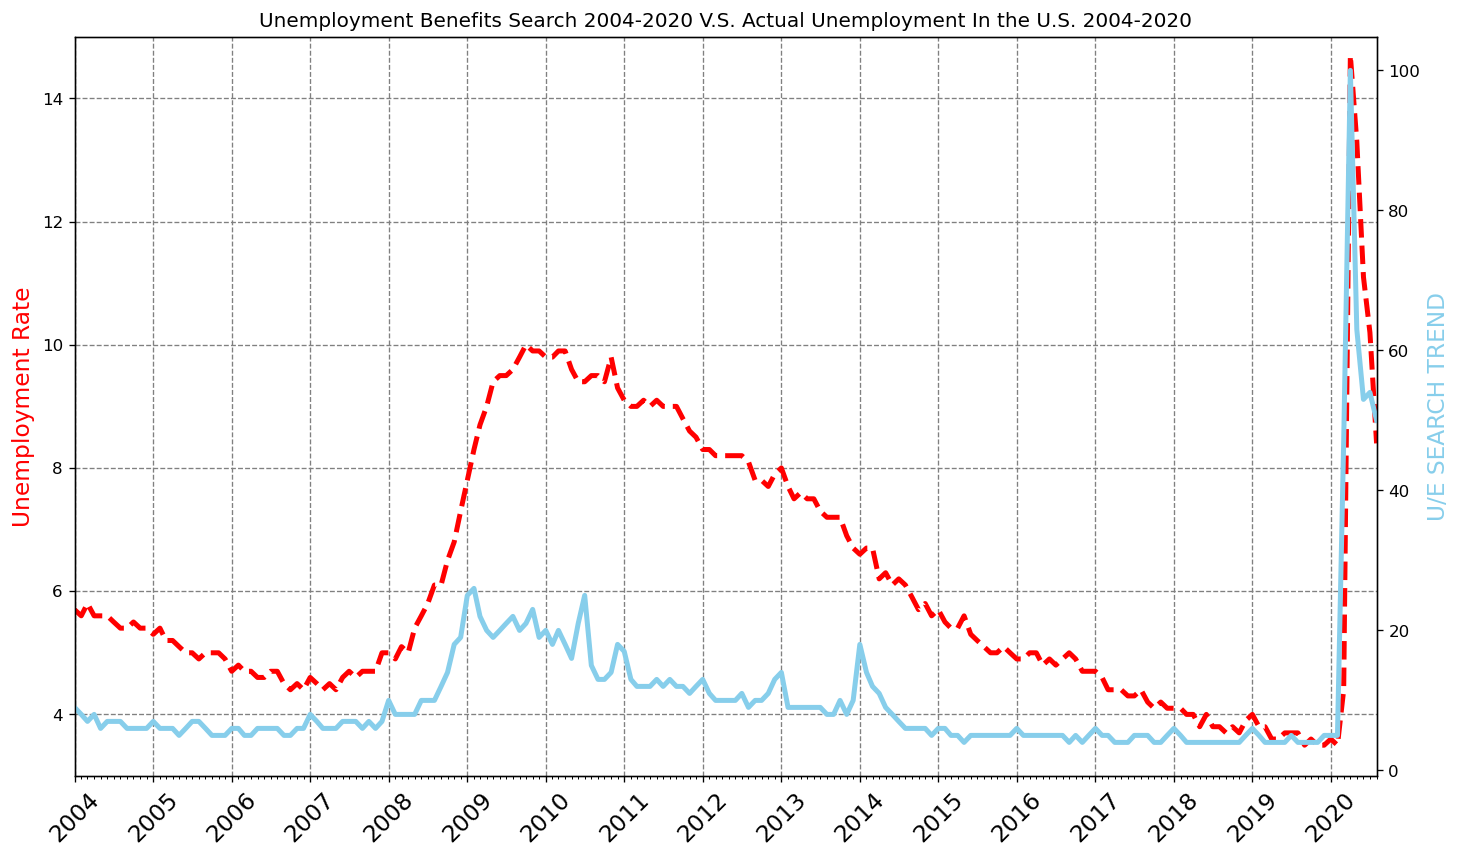

In [57]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Unemployment Benefits Search 2004-2020 V.S. Actual Unemployment In the U.S. 2004-2020", fontsize=12)
plt.xticks(fontsize=14, rotation=45)


ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')
ax1.set_ylim([3,15])
ax1.set_xlim(df_ue_2020["MONTH"].min(), df_ue_2020["MONTH"].max())

#roll_df = df_ue_2020[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_ue_2020['MONTH'],df_ue_2020["UNRATE"], color="red", linewidth=3, linestyle="dashed")
ax2.plot(df_ue_2020["MONTH"], df_ue_2020["UE_BENEFITS_WEB_SEARCH"], color="skyblue", linewidth=3)
ax1.set_ylabel("Unemployment Rate", fontsize=14, color = "red")
ax2.set_ylabel("U/E SEARCH TREND", fontsize=14, color = "skyblue")
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.xlabel("Years")

plt.show()

**The US unemployment rate spiked to unprecedented levels during the COVID pandemic, dwarfing the levels seen during the financial crisis.**